In [1]:
import sys
sys.path.append("..")
import os
from tqdm.notebook import tqdm
import numpy as np
from mango.environments import frozen_lake
import utils_plot, utils_save, utils_sim

In [2]:
# parameters for the environment
map_scale = 2
p_frozen = 0.5
start_anywhere = True

# parameters for the training
N_episodes =  1000
train_steps_per_episode = 10
episode_length = (4**map_scale)

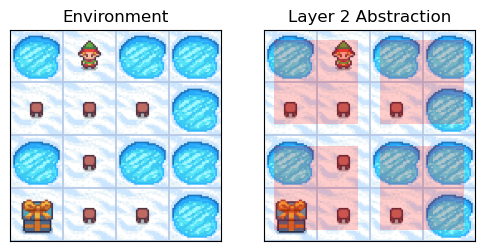

In [3]:
# create the environment and the option manager
env = utils_sim.make_env(map_scale, p_frozen, start_anywhere)
option_manager = utils_sim.make_option_manager(env, map_scale)
frozen_lake.plot_utils.plot_all_abstractions(option_manager)

In [4]:
# train loop
for layer_idx, layer in enumerate(option_manager.abstract_layers, start=1):
    for iteration, randomness in enumerate(tqdm(np.linspace(1, 0, N_episodes))):
        layer.set_randomness(0.0 if iteration % 2 else randomness)
        reward, info = layer.explore(episode_length)
        for _ in range(train_steps_per_episode):
            layer.train()

  0%|          | 0/1000 [00:00<?, ?it/s]

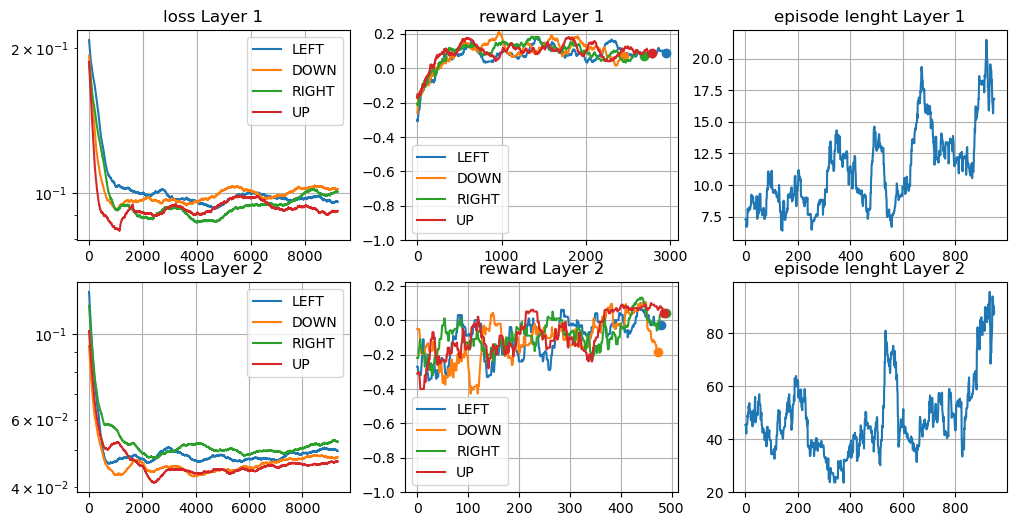

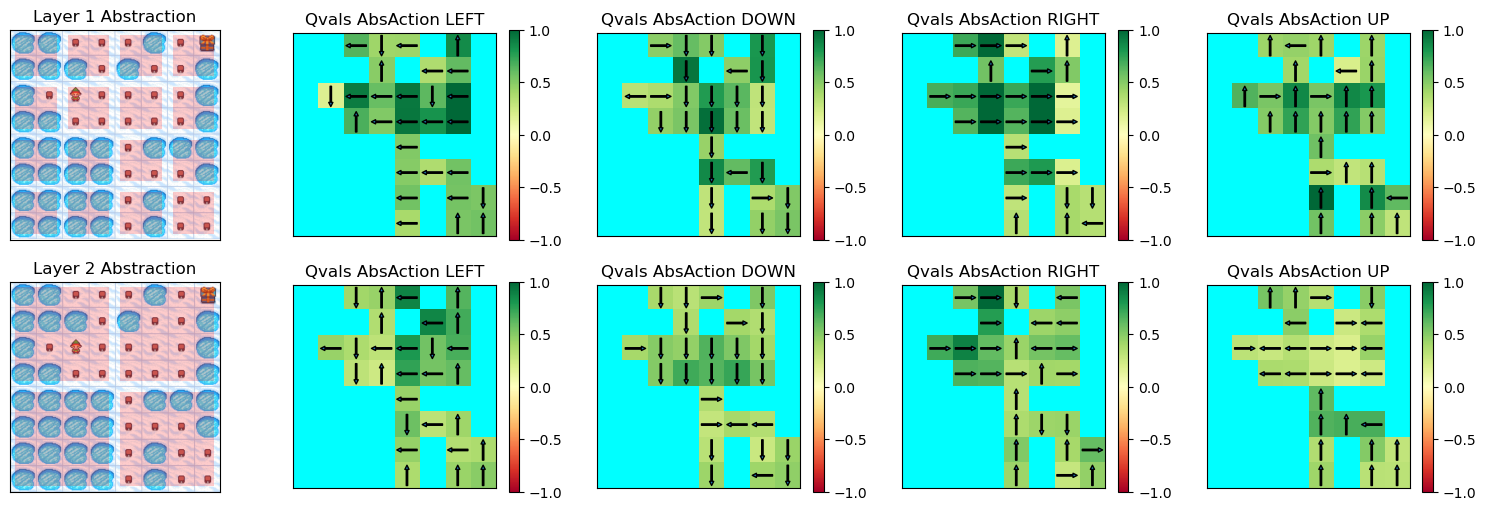

In [ ]:
dir_path = utils_save.path_to_save_dir(map_scale, p_frozen)
os.makedirs(dir_path, exist_ok=True)
utils_save.save_to_file(path=dir_path + "option_manager.pickle", obj=option_manager)
utils_plot.plot_mango_loss_reward(
    option_manager, save_path=dir_path + "option_manager_training.png"
)
obs, info = option_manager.reset()
frozen_lake.plot_utils.plot_all_qvals(
    option_manager, save_path=dir_path + "option_manager_qvals.png"
)